<div style="text-align: right"> Kevin Le </div>
<div style="text-align: right"> CSE 803 </div>
<div style="text-align: right"> Hw 2 </div>


In [4]:
#import for homework
import numpy as np
import os
import random
import math
import cmath
import cv2
from common import *

Image Filtering [50 pts]\
In this first section, you will explore different ways to filter images. Through these tasks you will build
up a toolkit of image filtering techniques. By the end of this problem, you should understand how the
development of image filtering techniques has led to convolution.

Image Patches [8 pts] A patch is a small piece of an image. Sometimes we will focus on the patches of
an image instead of operating on the entire image itself.

(5 pts) Take the image ’grace hopper.png’, load it as grayscale, and divide the image into 16
by 16 pixel image patches. Normalize each patch to have zero mean and unit variance. Complete the
function image patches in filters.py. Plot three of the 16x16 image patches in your report.

In [5]:
## Image Patches ##
def image_patches(image, patch_size=(16,16)):
    # Given an input image and patch_size,
    # return the corresponding image patches made
    # by dividing up the image into patch_size sections.
    # Input- image: H x W
    #        patch_size: a scalar tuple M, N 
    # Output- results: a list of images of size M x N
    
    h,w = image.shape
    output = []
    for j in range( 0, h, patch_size[0]):
        for i in range( 0, w, patch_size[1]):
            # split up a patch
            patch = image[ j : j + patch_size[0], i : i + patch_size[1]]
            # normalize each patch
            norm = (patch - patch.mean()) / patch.var()
            output.append(patch)
            
    return output

Note: there may be some patches not perfectly 16x16 due to the size of the image not being perfect to the patch sizes

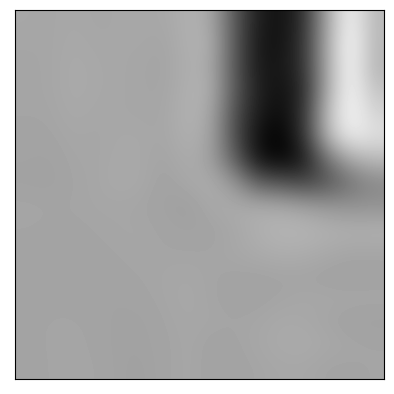

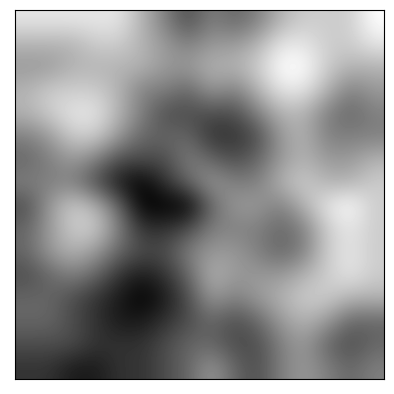

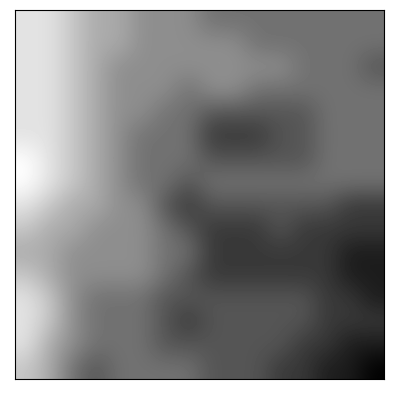

In [6]:
img = read_img('hw2_files/grace_hopper.png')
patches = image_patches(img)

display_img(patches[260])
display_img(patches[528])
display_img(patches[0])

(3 pts) Early work in computer vision used unique images patches as descriptors or features of images
for applications ranging from image alignment and stitching to object classification and detection.
Inspect the patches extracted in the previous question, and discuss, in a few sentences, why they
would be good or bad descriptors. Consider how those patches would look like if we changed the
object’s pose, scale, illumination, etc.

A patch is a great descriptor in the sense that it would keep all the information that comes from the original image, but on a smaller scale and at different locations. By breaking an image down, it would make processing quicker and allow for new ways to process the image. It is bad when the image is not normalized and and would cause issues in detail recognition. In the case for scaling, we would lose out on details due to resolution, and that would be amplified with patches.

Gaussian Filter [16 pts] \
A Gaussian filter is a filter whose impulse response is a Gaussian function. Here
we only talk about the discrete kernel and assume 2D Gaussian distribution is circularly symmetric.

$$1D\ Kernel\ :\ G(x) = \frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{x^{2}}{2\sigma^{2}}} \quad \quad 2D\ Kernel\ :\ G(x,y) = \frac{1}{2\pi\sigma^{2}}e^{-\frac{x^{2}+y^{2}}{2\sigma^{2}}}$$


(5 pts) For a 2D Gaussian filter with a given variance $\sigma^{2}$, the convolution can be reduced by sequential
operations of a 1D kernel. Prove that a convolution by a 2D Gaussian filter is equivalent to sequential
convolutions of a vertical and a horizontal 1D Gaussian filter. Specify the relationship between the
2D and 1D Gaussian filter, especially the relationship between their variances.

$$ 
\begin{align}
G(x) * G(y) &= \frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{x^{2}}{2\sigma^{2}}} * \frac{1}{\sqrt{2\pi\sigma^{2}}}e^{-\frac{y^{2}}{2\sigma^{2}}} \\
            &= \frac{1}{2\pi\sigma^{2}}e^{-\frac{x^{2}}{2\sigma^{2}}}e^{-\frac{y^{2}}{2\sigma^{2}}} \\
            &= \frac{1}{2\pi\sigma^{2}}e^{-\frac{x^{2}}{2\sigma^{2}} -\frac{y^{2}}{2\sigma^{2}}} \\
            &= \frac{1}{2\pi\sigma^{2}}e^{\frac{-x^{2}-y^{2}}{2\sigma^{2}}} \\
            &= \frac{1}{2\pi\sigma^{2}}e^{-\frac{x^{2}+y^{2}}{2\sigma^{2}}} \\
            &= G(x,y)
\end{align}
$$
The 1D kernels are the vertical and horizontal centers of the 2D kernel. All other spaces between the respective centers creates the variation pattern seen in a 2D kernel.

(4 pts) Take the image ’grace hopper.png’ as the input. Complete the function convolve()
and other related parts in filters.py. Use a Gaussian kernel with size 3 ×3 and $\sigma^{2} \approx \frac{1}{2ln(2)}$.
Plot the output images in your report. Describe what Gaussian filtering does to the image in one sentence.
Be sure to implement convolution and not cross-correlation.

Given $\sigma^{2} \approx \frac{1}{2ln(2)}$
$$
\begin{align}G(x,y) 
    &= \frac{1}{2\pi\frac{1}{2ln(2)}}e^{-\frac{x^{2}+y^{2}}{2\frac{1}{2ln(2)}}}\\
    &= \frac{ln(2)}{\pi}e^{-\frac{x^{2}+y^{2}}{2\frac{1}{2ln(2)}}}\\
    &= \frac{ln(2)}{\pi}e^{-({ln(2)}({x^{2}+y^{2}}))}\\
    &= \frac{ln(2)}{\pi}2^{-({x^{2}+y^{2}})}\\
\end{align}
$$

Given 3x3 kernel, where the center of origin is (0,0)
$$
kernel = 
\begin{bmatrix} 
    (-1,1) & (0,1) & (1,1) \\ 
    (-1,0) & (0,0) & (1,0) \\ 
    (-1,-1) & (0,-1) & (1,-1) 
\end{bmatrix}
$$
Thus $k_{Gaussian}$ is:
$$
k_{Gaussian} = 
\begin{pmatrix} 
    \frac{ln(2)}{4\pi} & \frac{ln(2)}{2\pi} & \frac{ln(2)}{4\pi} \\ 
    \frac{ln(2)}{2\pi} & \frac{ln(2)}{\pi} & \frac{ln(2)}{2\pi} \\ 
    \frac{ln(2)}{4\pi} & \frac{ln(2)}{2\pi} & \frac{ln(2)}{4\pi} 
\end{pmatrix}
$$

In [82]:
def convolve(image, kernel):
    # Return the convolution result: image * kernel.
    # Reminder to implement convolution and not cross-correlation!
    # Input- image: H x W
    #        kernel: h x w
    # Output- convolve: H x W

    # Get number of rows and columns
    row, col = image.shape

    #kernel radius
    #kernel radius is the same as pad width
    k_radius = np.max(kernel.shape) // 2

    output = np.zeros(image.shape)

    # Make a copy and pad the edges
    padded = np.pad(image, k_radius, 'edge')

    # Traverse the image, ignoring the padded edges
    for y in range(k_radius, row + k_radius):
        for x in range(k_radius, col + k_radius):
            # Grab window
            window = padded[y - k_radius : y + k_radius + 1,\
                x - k_radius : x + k_radius + 1]
            #convolve the window
            output[y - k_radius, x - k_radius] = (kernel * window).sum()
    return output

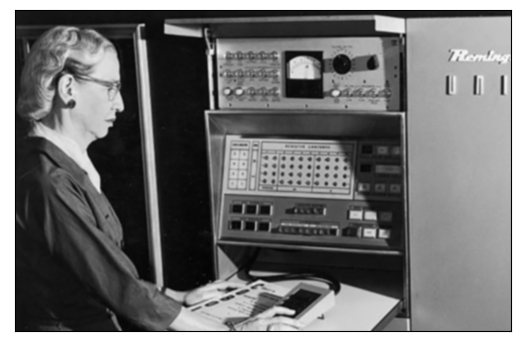

In [83]:
kernel_gaussian = np.array([
    [math.log(2)/(4*math.pi),math.log(2)/(2*math.pi),math.log(2)/(4*math.pi)],
    [math.log(2)/(2*math.pi),math.log(2)/(math.pi),math.log(2)/(2*math.pi)],
    [math.log(2)/(4*math.pi),math.log(2)/(2*math.pi),math.log(2)/(4*math.pi)]
])

filtered_gaussian = convolve(img, kernel_gaussian)
display_img(filtered_gaussian)

(3 pts) Consider the image as a function $I(x, y)$ and $I : \mathbb{R}^{2} \rightarrow \mathbb{R}$. When working on edge detection,
we often pay a lot of attention to the derivatives. Denote the derivatives:
$$I_{x}(x, y) = \frac{\partial I}{\partial x}(x, y) \approx \frac{1}{2}(I(x + 1, y) − I(x − 1, y))$$
$$I_{y}(x, y) = \frac{\partial I}{\partial y}(x, y) \approx \frac{1}{2}(I(x, y + 1) − I(x, y − 1))$$

<strong>Derive</strong> the convolution kernels for derivatives: $(i)\ k_{x} \in \mathbb{R}^{1×3} : I_{x} = I∗k_{x};\ (ii)\ k_{y} \in \mathbb{R}^{3×1}: I_{y} = I∗k_{y}.$
Follow the detailed instructions in filters.py and complete the function edge detection()
in filters.py, whose output is the gradient magnitude

In [84]:
def edge_detection(image):
    # Return the gradient magnitude of the input image
    # Input- image: H x W
    # Output- grad_magnitude: H x W

    kx = np.array([
        [-1/2, 0, 1/2],
    ])  
    ky = np.array([
        [-1/2], 
        [0], 
        [1/2]
    ]) 

    Ix = convolve(image, kx)
    Iy = convolve(image, ky)

    grad_magnitude = np.sqrt((Ix ** 2) + (Iy ** 2))

    return grad_magnitude, Ix, Iy

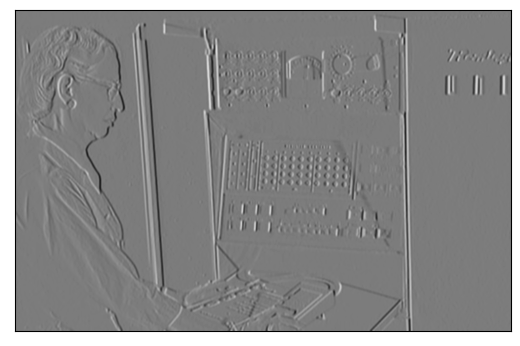

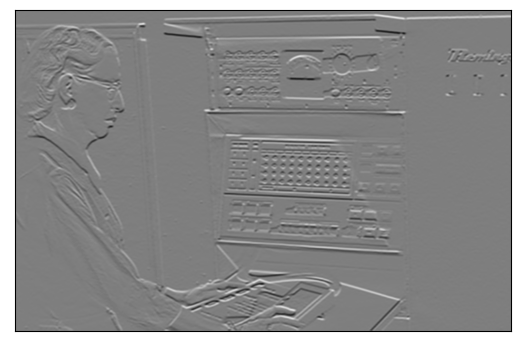

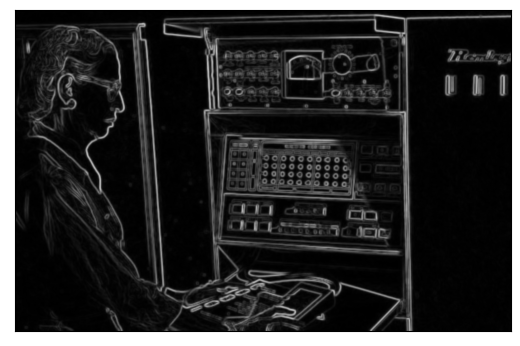

In [85]:
g_mag, edgeX, edgeY = edge_detection(img)
display_img(edgeX)
display_img(edgeY)
display_img(g_mag)

(4 pts) Use the original image and the Gaussian-filtered image as inputs respectively. <strong>Plot</strong> both outputs
in your report. <strong>Discuss</strong> the difference between the two images in no more than three sentences.

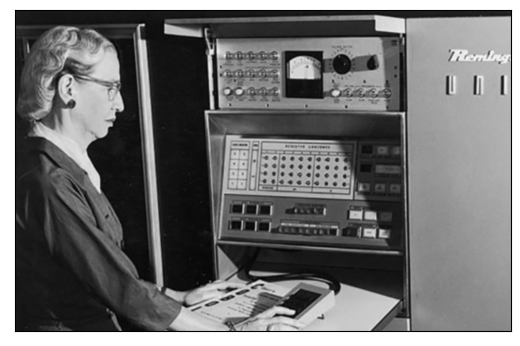

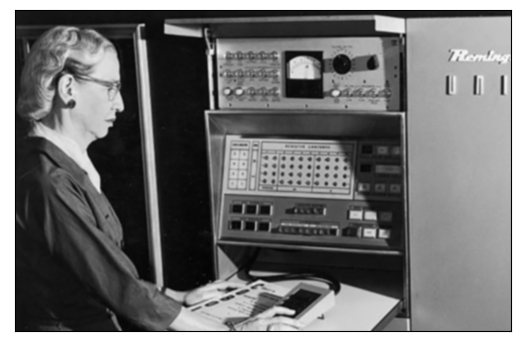

In [11]:
display_img(img)
display_img(filtered_gaussian)

Some bright spots from the original image gets dulled in the gaussian filter and some edges are blurred.

Sobel Operator [18 pts]\
The Sobel operator is often used in image processing and computer vision.
Technically, it is a discrete differentiation operator, computing an approximation of the derivative of the
image intensity function.

(5 pts) Focus on the derivatives of the Gaussian-filtered image. Suppose we use this Gaussian kernel:
$$k_{Gaussian} = \begin{pmatrix} 1 & 2 & 1 \\2 & 4 & 2 \\1 & 2 & 1 \end{pmatrix}$$

Denote the input image as I. <strong>Prove</strong> that the derivatives of the Gaussian-filtered image $(I ∗ k_{Gaussian})$
can be approximated by :

$$G_{x} = I ∗ \begin{pmatrix} 1 & 0 & −1 \\ 2 & 0 & −2 \\ 1 & 0 & −1 \end{pmatrix} \quad \quad \quad G_{y} = I ∗ \begin{pmatrix} 1 & 2 & 1 \\ 0 & 0 & 0 \\ -1 & 2 & −1 \end{pmatrix}$$

These are the sobel operators.
<strong>Hint</strong>: To derive the derivatives of an image, you can use the conclusion in <strong>Gaussian Filter - Q3</strong>, i.e.
$G_{x}$ can be calculated by $(I ∗ k_{Gaussian})_{x}$ using the $k_{x}$ derived before.


Given that 
$$I_{x}(x, y) = \frac{\partial I}{\partial x}(x, y) \approx \frac{1}{2}(I(x + 1, y) − I(x − 1, y))$$
$$I_{y}(x, y) = \frac{\partial I}{\partial y}(x, y) \approx \frac{1}{2}(I(x, y + 1) − I(x, y − 1))$$
Let $$S_{x} =  \begin{pmatrix} 1 & 0 & −1 \\ 2 & 0 & −2 \\ 1 & 0 & −1 \end{pmatrix} \quad \quad \quad S_{y} = \begin{pmatrix} 1 & 2 & 1 \\ 0 & 0 & 0 \\ -1 & 2 & −1 \end{pmatrix}$$
$$
\frac{1}{2}(S_{x} * S{y}) = k_{Gaussian} = \begin{pmatrix} 1 & 2 & 1 \\2 & 4 & 2 \\1 & 2 & 1 \end{pmatrix} \\
\frac{1}{2} \begin{pmatrix} 2 & 4 & 2 \\ 4 & 8 & 4 \\ 2 & 4 & 2 \end{pmatrix} = k_{Gaussian} = \begin{pmatrix} 1 & 2 & 1 \\2 & 4 & 2 \\1 & 2 & 1 \end{pmatrix}
$$

(4 pts) Take the image ’grace hopper.png’ as the original image I. Complete the corresponding
part of function sobel operator() in filters.py with the kernels given previously. <strong>Plot</strong> the
Gx, Gy, and the gradient magnitude.

In [12]:
def sobel_operator(image):
    # Return Gx, Gy, and the gradient magnitude.
    # Input- image: H x W
    # Output- Gx, Gy, grad_magnitude: H x W

    sobelX = np.array([
        [1, 0, -1],
        [2, 0, -2],
        [1, 0, -1]
    ])
    sobelY = np.array([
        [1, 2, 1],
        [0, 0, 0],
        [-1, -2, -1]
    ])

    Gx, Gy = convolve(image, sobelX), convolve(image, sobelY)
    grad_magnitude = np.sqrt((Gx**2) + (Gy**2))

    return Gx, Gy, grad_magnitude

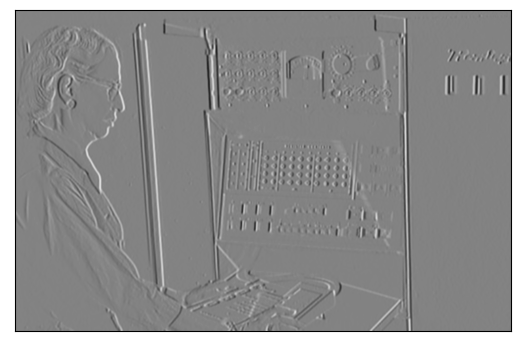

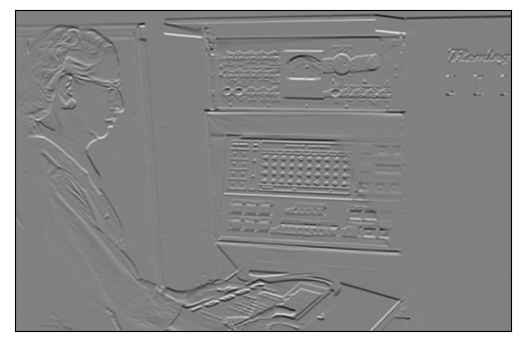

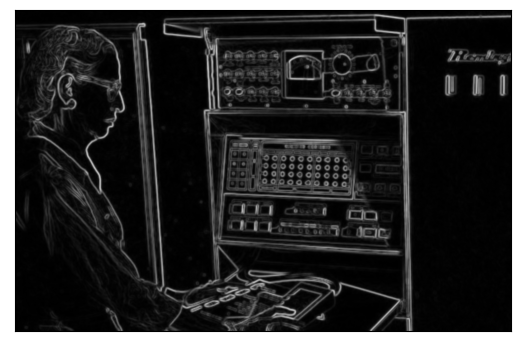

In [13]:
Gx, Gy, edge_sobel = sobel_operator(img)
display_img(Gx)
display_img(Gy)
display_img(edge_sobel)

Now we want to explore what will happen if we use a linear combination of the two Sobel operators.
Here, the linear combination of the original kernels is called a steerable filter.

(a) (3 pt) We want to use 3x3 kernel to approximate $S(I, \alpha) = G_{x} cos\ \alpha + G_{y} sin\ \alpha$. <strong>Derive</strong> the kernel in terms of α, i.e. the $K(\alpha)$ which makes $S(I, \alpha) = I ∗ K(\alpha)$.

Given $$G_{x} = I ∗ \begin{pmatrix} 1 & 0 & −1 \\ 2 & 0 & −2 \\ 1 & 0 & −1 \end{pmatrix} \quad \quad \quad G_{y} = I ∗ \begin{pmatrix} 1 & 2 & 1 \\ 0 & 0 & 0 \\ -1 & 2 & −1 \end{pmatrix}$$
and $$S(I,\alpha) = G_{x}cos\alpha+G_{y}sin\alpha \quad \quad \quad S(I,\alpha) = I * K(\alpha)$$

Let 
$$
\begin{pmatrix} 1 & 0 & −1 \\ 2 & 0 & −2 \\ 1 & 0 & −1 \end{pmatrix} = S_{x}\\
\begin{pmatrix} 1 & 2 & 1 \\ 0 & 0 & 0 \\ -1 & 2 & −1 \end{pmatrix} = S_{y}
$$
$$
G_{x}cos\alpha+G_{y}sin\alpha = I * K(\alpha)\\
I ∗ S_{x} * cos\alpha + I ∗ S_{y} * sin\alpha = I * K(\alpha)\\
S_{x} * cos\alpha + S_{y} * sin\alpha = K(\alpha)\\
\begin{pmatrix} cos\alpha & 0 & −cos\alpha \\ 2cos\alpha & 0 & −2cos\alpha \\ cos\alpha & 0 & −cos\alpha \end{pmatrix} + \begin{pmatrix} sin\alpha & 2sin\alpha & sin\alpha \\ 0 & 0 & 0 \\ -sin\alpha & 2sin\alpha & −sin\alpha \end{pmatrix} = K(\alpha)
$$
Thus
$$
\begin{pmatrix} cos\alpha + sin\alpha & 2sin\alpha & sin\alpha −cos\alpha \\ 2cos\alpha & 0 & −2cos\alpha \\ cos\alpha - sin\alpha & -2sin\alpha & -1(sin\alpha+cos\alpha) \end{pmatrix} = K(\alpha)
$$


(b) (3 pts) Complete the function steerable filter() in filters.py. Take $\alpha = 0, \frac{\pi}{6}, \frac{\pi}{3}, \frac{\pi}{2}, \frac{2\pi}{3}, \frac{5\pi}{6}$. Plot the output images in your report.\

In [14]:
from math import cos
from cmath import sin
def steerable_filter(image, angles=[0, np.pi/6, np.pi/3, \
    np.pi/2, np.pi*2/3, np.pi*5/6]):
    # Given a list of angels used as alpha in the formula,
    # return the corresponding images based on the formula given in pdf.
    # Input- image: H x W
    #        angels: a list of scalars
    # Output- results: a list of images of H x W

    output = []
    for a in angles:
        steerable_kernel = np.array([
            [cos(a) + sin(a), 2 * sin(a), sin(a) - cos(a)],
            [2 * cos(a), 0, -2 * cos(a)],
            [cos(a) - sin(a), -2 * sin(a), -1*(sin(a) + cos(a))]
        ])
        output.append(convolve(image, steerable_kernel))
    return output

C:\Users\Kevin Le\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:26: ComplexWarning: Casting complex values to real discards the imaginary part


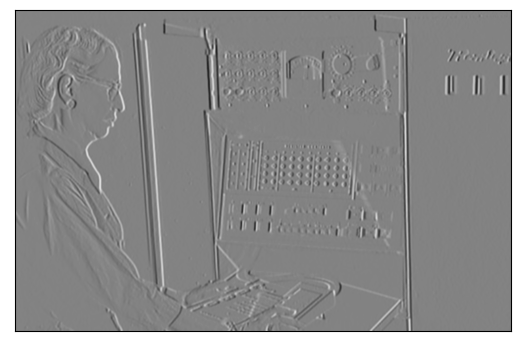

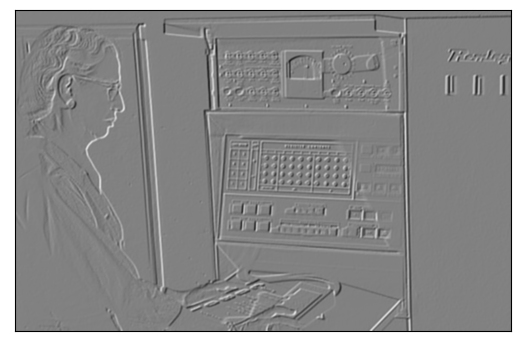

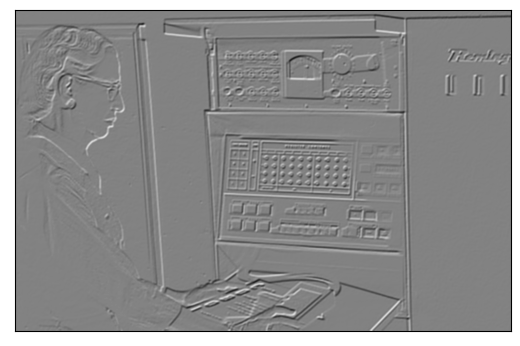

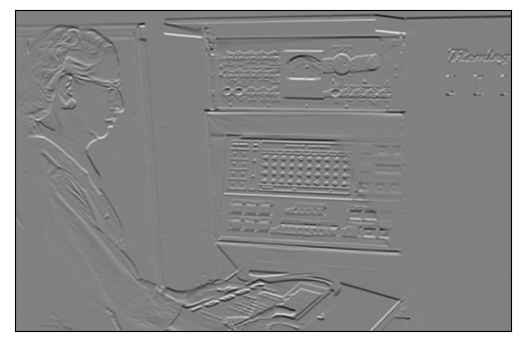

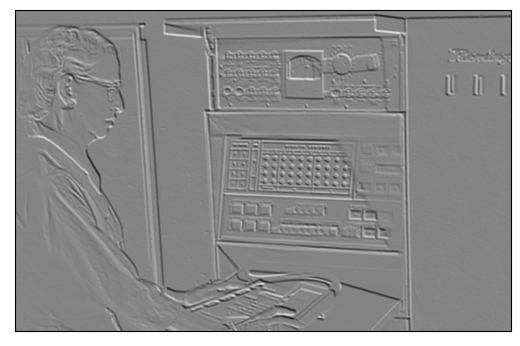

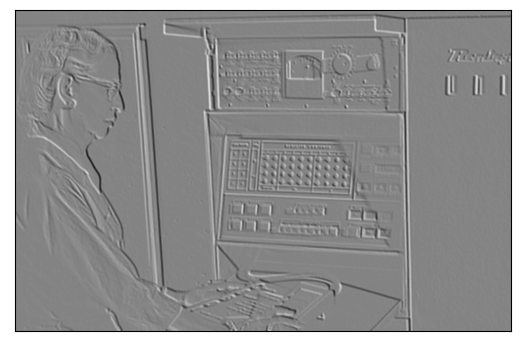

In [15]:
steerable_list = steerable_filter(img)
for steerable in steerable_list:
    display_img(steerable)

(c) (3 pts) Observe the plotting results. What do these kernels detect? Discuss how the outputs
change with α.

The kernel is detecting the edge that is aligned with $\alpha$. As you input angles you can see that the edges start to transition between $Sobel_{x}$ and $Sobel_{y}$ seen earlier in the problem. When $\alpha = 0$ you get $Sobel_{x}$ and when $\alpha = \frac{\pi}{2}$ you get $Sobel_{y}$. This transition keeps occuring as you rotate $\alpha$ like on a unit circle.

LoG Filter [8 pts] \
 Laplacian is a differential operator: $\triangledown^{2}I(x, y) = \frac{\partial^{2} I(x,y)}{\partial x^{2}}  + \frac{\partial^{2} I(x,y)}{\partial y^{2}}$. And the Laplacian
of Gaussian (LoG) operation is very useful in computer vision.

(5 pts) In filters.py, you are given two LoG filters. You are not required to prove that they are
LoG, but you are encouraged to know what an LoG filter looks like. Complete the corresponding part
in filters.py. Plot the outputs of these two LoG filters in your report. Compare the two results.
Explain the reasons for the difference. Discuss whether these filters can detect edges. Can they detect
anything else?
Hint: We can take the high-value pixels in the outputs as the detected parts.

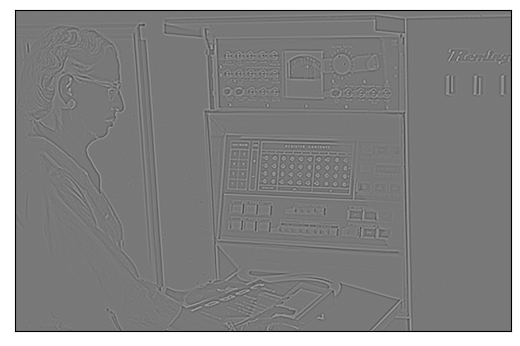

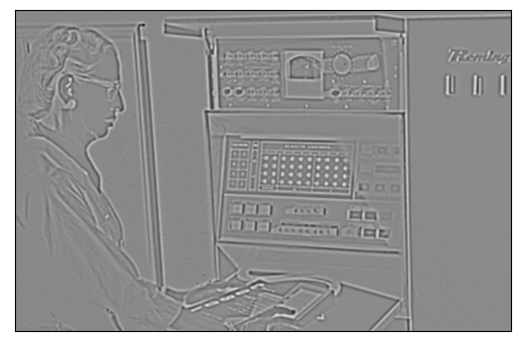

In [16]:
kernel_LoG1 = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
kernel_LoG2 = np.array([
    [0, 0, 3, 2, 2, 2, 3, 0, 0],
    [0, 2, 3, 5, 5, 5, 3, 2, 0],
    [3, 3, 5, 3, 0, 3, 5, 3, 3],
    [2, 5, 3, -12, -23, -12, 3, 5, 2],
    [2, 5, 0, -23, -40, -23, 0, 5, 2],
    [2, 5, 3, -12, -23, -12, 3, 5, 2],
    [3, 3, 5, 3, 0, 3, 5, 3, 3],
    [0, 2, 3, 5, 5, 5, 3, 2, 0],
    [0, 0, 3, 2, 2, 2, 3, 0, 0]
])
filtered_LoG1 = convolve(img, kernel_LoG1)
display_img(filtered_LoG1)
filtered_LoG2 = convolve(img, kernel_LoG2)
display_img(filtered_LoG2)

The 2nd LoG is Brighter then the 1st. This is most likely due to the increased intensity of the values from the image calculation coming from the values of the 2nd LoG matrix. The change is also occuring due to the increased kernel size. The pixel will be weighted on a larger area of neighbors. LoG seems to be able to detect edges, more specifically, it shows regions of rapid intensity change.

(3 pts) Instead of calculating LoG, we can often approximate it with a simple Difference of Gaussians
(DoG). Try to explain why this approximation works.
Hint: Try visualizing the following functions: two Gaussian functions with different variances, the
difference between the two functions, Laplacian of a Gaussian function

The LoG is the 2nd derivative of a Gaussian, and since it is separable, can be approximated by the DoG. The greater Gaussian will have a similar peak to the LoG. The smaller Gaussian, when subtracted from the greater, would move the peak lower to the LoG.

Laplacian of Gaussian-filtered image $= \triangledown^{2}((f(x,y)\bigotimes G(x,y) )) = \triangledown^{2}G(x,y)\bigotimes f(x,y) =$ LoG

Feature Extraction [15 pts]\
While edges can be useful, corners are often more informative features as they are less common. In this
section, we implement a Harris Corner Detector (see: https://en.wikipedia.org/wiki/Harris Corner Detector)
to detect corners. Corners are defined as locations (x, y) in the image where a small change any direction
results in a large change in intensity if one considers a small window centered on (x, y) (or, intuitively,
one can imagine looking at the image through a tiny hole that’s centered at (x, y)). This can be contrasted
with edges where a large intensity change occurs in only one direction, or flat regions where moving in any
direction will result in small or no intensity changes. Hence, the Harris Corner Detector considers small
windows (or patches) where a small change in location leads large variation in multiple directions (hence
corner detector).
This question looks a bit long, but that is only because there is a fairly large amount of hand-holding
involved. The resulting solution, if done properly, is certainly under 10 lines.


Let’s consider a grayscale image where I(x, y) is the intensity value at image location (x, y). We can
calculate the corner score for every pixel (i, j) in the image by comparing a window W centered on (i, j)
with that same window centered at (i+u, j+v). Specifically, we will compute the sum of square differences
between the two:
$$
E(u,v) = \sum_{x,y\in W}[I(x + u, y+v) - I(x,y)]^{2}
$$
Your first task is to write a function that calculates this function for all pixels (i, j) with a fixed offset (u, v)
and window size W. In other words, if we calculate S = cornerscore(u, v), S is an image such that Sij is
the SSD between the window centered on (i, j) in I and the window centered on (i + u, j + v) in I. The
function will need to calculate this function to every location in the image. This is doable via a quadruple
for-loop (for every pixel (i, j), for every pixel (x, y) in the window centered at (i, j), compare the two). Use
same padding for offset-window values that lie outside of the image.

In [70]:
def corner_score(image, u=5, v=5, window_size=(5,5)):
    # Given an input image, x_offset, y_offset, and window_size,
    # return the function E(u,v) for window size W
    # corner detector score for that pixel.
    # Input- image: H x W
    #        u: a scalar for x offset
    #        v: a scalar for y offset
    #        window_size: a tuple for window size
    #
    # Output- results: a image of size H x W
    # Use zero-padding to handle window values outside of the image. 

    h, w = image.shape
    # Get window radius
    window_radius = window_size[0] // 2
    # Find padding size
    pad = window_radius + max(abs(v), abs(u))
    # Pad image
    padded = np.pad(image, pad, 'edge')
    output = np.zeros(image.shape)
    
    #Traverse the image, ignoring the padded edges
    for y in range(pad, h + pad):
        for x in range(pad, w + pad):
            # Grab window
            window = padded[y - window_radius : y + window_radius,\
                x - window_radius: x + window_radius]
            offset_window = padded[y - window_radius + v : y + window_radius + v,\
                 x - window_radius + u : x + window_radius + u]
            output[y - pad, x - pad] = ((offset_window - window) ** 2).sum()
    return output

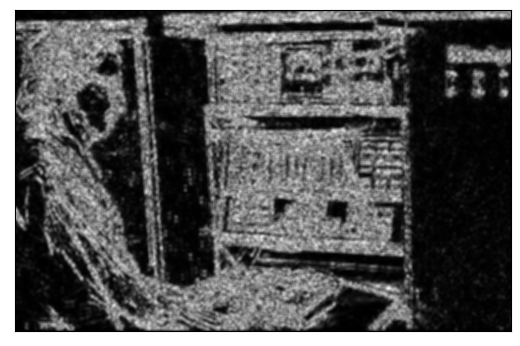

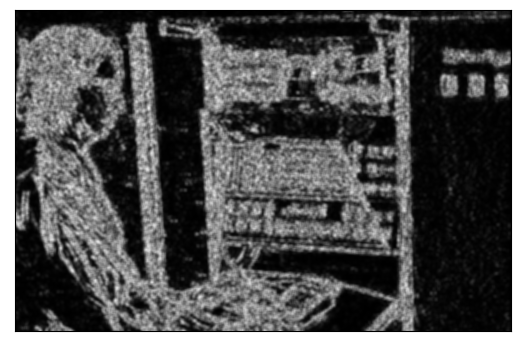

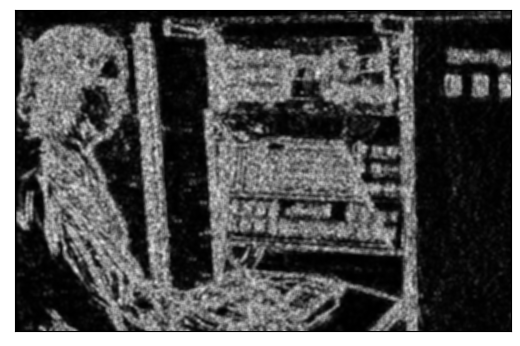

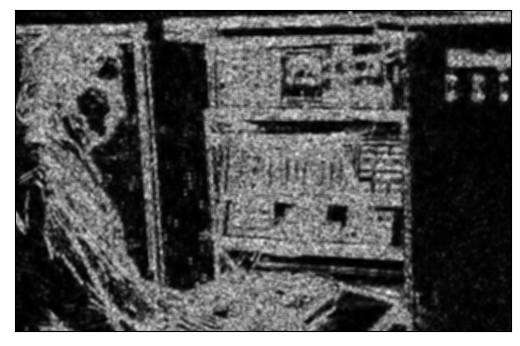

In [71]:
# define offsets and window size and calulcate corner score
score_up    = corner_score(img, 0, 5)
display_img(score_up)

score_right = corner_score(img, 5, 0)
display_img(score_right)

score_left  = corner_score(img, -5, 0)
display_img(score_left)

score_down  = corner_score(img, 0, -5)
display_img(score_down)

2.2 Harris Corner Detector [10pt]\
For every single pixel (i, j), you now have a way of computing how much changing by (u, v) changes
the appearance of a window (i.e., E(u, v) at (i, j)). But in the end, we really want a single number of
“cornerness” per pixel and don’t want to handle checking all the (u, v) values at every single pixel (i, j).
You’ll implement the cornerness score invented by Harris and Stephens [1988].

$$
E(u,v)\approx\sum_{W}(I^{2}_xu^{2}+2I_{x}I_{y}uv+I^{2}_{y}v^{2}) = [u,v]\begin{bmatrix}\sum_{W}I^{2}_{x} & \sum_{W} I_{x}I_{y} \\ \sum_{W} I_{x}I_{y} & \sum_{W}I^{2}_{y}\end{bmatrix} [u,v]^{T} = [u,v]M[u,v]^{T}
$$

In [19]:
def harris_detector(image, window_size=(5,5)):
    # Given an input image, calculate the Harris Detector score for all pixels
    # Input- image: H x W
    # Output- results: a image of size H x W
    # 
    # You can use same-padding for intensity (or zero-padding for derivatives) 
    # to handle window values outside of the image. 

    ## compute the derivatives 
    Ix = np.array([
        [1, 0, -1],
        [2, 0, -2],
        [1, 0, -1]
    ])
    Iy = np.array([
        [1, 2, 1],
        [0, 0, 0],
        [-1, -2, -1]
    ])

    Ixx = convolve(image, Ix)
    Iyy = convolve(image, Iy)
    Ixy = convolve(convolve(image, Ix),Iy)

    alpha = 0.05
    det = Ixx*Iyy -Ixy**2
    trace = Ixx + Iyy

    # For each location of the image, construct the structure tensor and calculate the Harris response
    response = det - alpha * trace

    return response

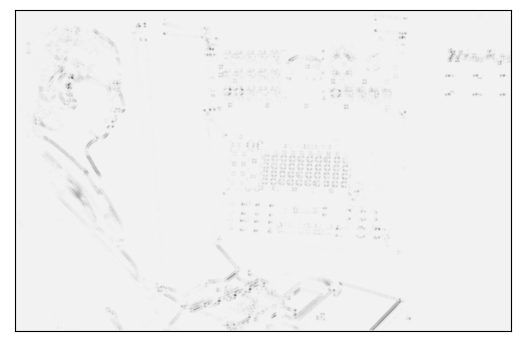

In [20]:
harris_corners = harris_detector(img)
display_img(harris_corners)

Blob Detection [35pts]

Given functions to help display answers

In [21]:
def find_maxima(scale_space, k_xy=5, k_s=1):
    # Extract the peak x,y locations from scale space
    # Input-    scale_space: Scale space of size HxWxS
    #           k: neighborhood in x and y
    #           ks: neighborhood in scale
    # Output-   list of (x,y) tuples; x<W and y<H
    if len(scale_space.shape) == 2:
        scale_space = scale_space[:, :, None] 

    H,W,S = scale_space.shape
    maxima = []
    for i in range(H):
        for j in range(W):
            for s in range(S):
                # extracts a local neighborhood of max size (2k_xy+1, 2k_xy+1, 2k_s+1)
                neighbors = scale_space[max(0, i-k_xy):min(i+k_xy,H), 
                                        max(0, j-k_xy):min(j+k_xy,W), 
                                        max(0, s-k_s) :min(s+k_s,S)]
                mid_pixel = scale_space[i,j,s]
                num_neighbors = np.prod(neighbors.shape) - 1
                # if mid_pixel is larger than all the neighbors; append maxima 
                if np.sum(mid_pixel > neighbors) == num_neighbors:
                    maxima.append( (i,j,s) )
    return maxima

def visualize_scale_space(scale_space, min_sigma, k, file_path=None):
    # Visualizes the scale space
    # Input-    scale_space: scale space of size HxWxS
    #           min_sigma: the minimum sigma used 
    #           k: the sigma multiplier 
    if len(scale_space.shape) == 2:
        scale_space = scale_space[:, :, None] 
    H, W, S = scale_space.shape

    # number of subplots
    p_h = int(np.floor(np.sqrt(S))) 
    p_w = int(np.ceil(S/p_h))
    for i in range(S):
        plt.subplot(p_h, p_w, i+1)
        plt.axis('off')
        plt.title('{:.1f}:{:.1f}'.format(min_sigma * k**i, min_sigma * k**(i+1)))
        plt.imshow(scale_space[:, :, i])

    # plot or save to fig 
    if file_path:
        plt.savefig(file_path)
    else:
        plt.show()    

def visualize_maxima(image, maxima, min_sigma, k, file_path=None):
    # Visualizes the maxima on a given image
    # Input-    image: image of size HxW
    #           maxima: list of (x,y) tuples; x<W, y<H
    #           file_path: path to save image. if None, display to screen
    # Output-   None 
    H, W = image.shape
    fig,ax = plt.subplots(1)
    ax.imshow(image)
    for maximum in maxima:
        y,x,s= maximum 
        assert x < W and y < H and x >= 0 and y >= 0
        radius = np.sqrt(2 * min_sigma * (k ** s))
        circ = plt.Circle((x, y), radius, color='r', fill=False)
        ax.add_patch(circ)

    if file_path:
        plt.savefig(file_path)
    else:
        plt.show()     

Single-scale Blob Detection [10 pt] 
Your first task is to use DoG filters to detect blobs of a single scale.
Implement the function guassian filter in blob detection.py that takes as an input an image and the standard deviation, $\sigma$, for a Gaussian filter and returns the Gaussian filtered image. Read in
‘polka.png‘ as a gray-scale image and find two pairs of $\sigma$ values for a DoG such that the first set responds highly to the large circles, while the second set only responds highly the small circles. For choosing
the appropriate sigma values, recall that radius and standard deviation of a Gaussian are related by the following equation: $r =\sqrt{2\sigma}$. Plot the two responses and report the parameters used to obtain each. Comment
on the responses in a few lines: how many maxima are you observing? are there false peaks that are getting
high values


In [22]:
def gaussian_filter(image, sigma):
    # Given an image, apply a Gaussian filter with the input kernel size
    # and standard deviation 
    # Input-    image: image of size HxW
    #           sigma: scalar standard deviation of Gaussian Kernel
    # Output-   Gaussian filtered image of size HxW
    H, W = image.shape
    # -- good heuristic way of setting kernel size 
    kernel_size = int(2 * np.ceil(2*sigma) + 1)

    # make sure that kernel size isn't too big and is odd 
    kernel_size = min(kernel_size, min(H,W)//2)     
    if kernel_size % 2 == 0: kernel_size = kernel_size + 1  
    #feel free to use your implemented convolution function or a convolution function from a library
    kg = np.zeros([kernel_size, kernel_size])
    dist_from_center = (kernel_size - 1) / 2
    #Create Gaussian kernel
    for y in range(kernel_size):
        for x in range(kernel_size):
            kg[y,x] = 1/(2*np.pi*sigma**2)*\
                math.exp(-((y-dist_from_center)**2+\
                    (x-dist_from_center)**2)/(2*sigma**2))   
    output = convolve(image, kg) 
    return output

Detect small polka dots


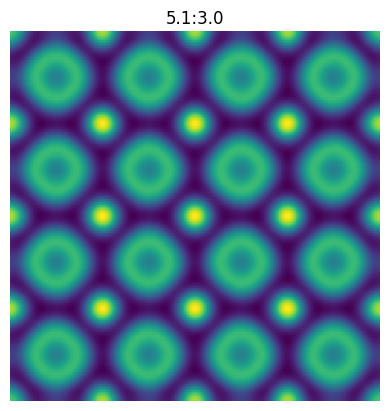

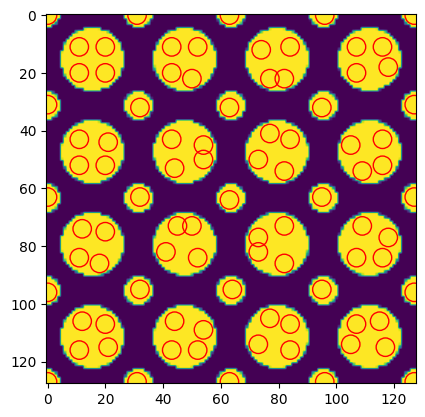

In [23]:
image = read_img('hw2_files\polka.png')
### -- Detecting Polka Dots -- ## 
print("Detect small polka dots")
# -- Detect Small Circles
sigma_1 = 5.1
sigma_2 = 3
gauss_1 = gaussian_filter(image, sigma_1)
gauss_2 = gaussian_filter(image, sigma_2)

# calculate difference of gaussians
DoG_small = gauss_2 - gauss_1

# visualize maxima 
maxima = find_maxima(DoG_small, k_xy=int(sigma_1))
visualize_scale_space(DoG_small, sigma_1, sigma_2/sigma_1,'polka_small_DoG.png')
visualize_maxima(image, maxima, sigma_1, sigma_2/sigma_1, 'polka_small_maxima.png')

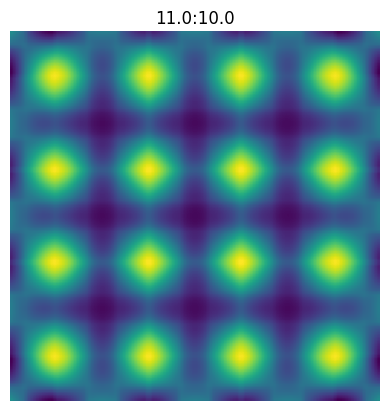

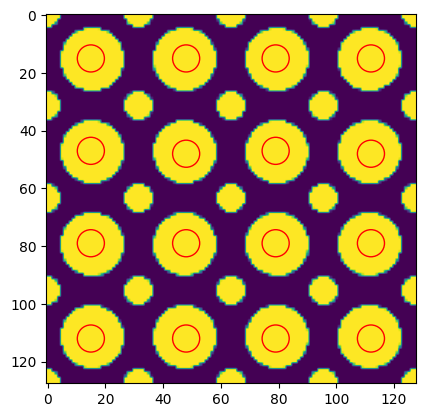

In [24]:
# # -- Detect Large Circles
# print("Detect large polka dots")
sigma_1 = 11
sigma_2 = 10
gauss_1 = gaussian_filter(image, sigma_1)
gauss_2 = gaussian_filter(image, sigma_2)

# # calculate difference of gaussians 
DoG_large = gauss_2 - gauss_1

# visualize maxima 
# Value of k_xy is a sugguestion; feel free to change it as you wish.
maxima = find_maxima(DoG_large, k_xy=10)
visualize_scale_space(DoG_large, sigma_1, sigma_2/sigma_1, 'polka_large_DoG.png')
visualize_maxima(image, maxima, sigma_1, sigma_2/sigma_1, 'polka_large.png')

Scale Space Representation [10 pt]\
In this part, we will construct a Scale Space Representation of the
image to detect blobs at multiple scales. In this representation, we represent the image by the DoG at
different scales by filtering the images with Gaussian kernels of different width; i.e., different standard
deviation. The image below shows a scale space DoG response of an image of a sunflower field; notice
that different size circles have higher intensities at different scales. Your task is to implement the function
scale space in blob detection.py. The function takes as input the image, the smallest standard
deviation (σmin), the standard deviation multiplier (k), and the number of scales (S). You are advised to use
default values for k and S as they capture a sufficiently wide range of scales (8 scales with the largest scale
being 16x the smallest) The function should construct a scale space with S − 1 levels, such that level $i$ is the
Difference of Gaussian filtered images with standard deviation $(\sigma_{min} ∗ k^{i})$ and $(\sigma_{min} ∗ ∗ k^{i-1})$.


Find good parameters for the scale space function to detect both polka dot sizes. Generate the scale space
output for ‘polka.png‘. For parameters, we suggest using k = $\sqrt{2}$, S = 8 and the first sigma value for
detecting small polka dots (from the first part of this question) as your $\sigma_{min}$. Feel free to use a different set
of parameters, but the values suggested should serve as a good initialization. Plot the different scales using
visualize scale space(). Are you able to clearly see the different maxima in the image?


In [25]:
def scale_space(image, min_sigma, k=np.sqrt(2), S=8):
    # Calcualtes a DoG scale space of the image
    # Input-    image: image of size HxW
    #           min_sigma: smallest sigma in scale space
    #           k: scalar multiplier for scale space
    #           S: number of scales considers
    # Output-   Scale Space of size HxWx(S-1)
    output = np.zeros([image.shape[0],image.shape[1]])
    for i in range(S-1,1,-1):
        s1 = min_sigma * (k**i)
        s2 = min_sigma * (k**(i-1))
        output[:,:] = gaussian_filter(image, s2) - gaussian_filter(image, s1)
    return output

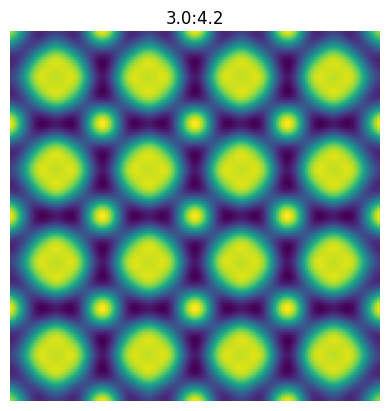

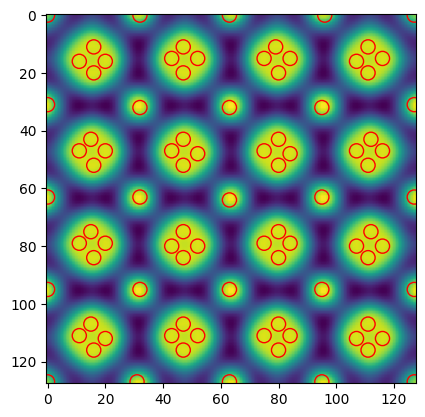

In [26]:
s_output = scale_space(image, 3)
maxima = find_maxima(s_output, k_xy=3)
visualize_scale_space(s_output, 3, np.sqrt(2), "polka_scale_space.png")
visualize_maxima(s_output, maxima, 3, 100, 'polka_scale_space_maxima.png')

The maxima detection is very close. After creating the scale space, the center of the large polka dot is not bright enought, and that's why there is an issue with not having a centered blob detected.

Blob Detection [5 pt]\
While we can visually identify peaks with relative ease, automatic maxima detection
can result in spurious false positives or false negatives. Your task here is to automatically detect the peaks
from the 3D matrix scale space response output in the previous function. We have provided a function,
find maxima, that finds outputs finds the local maxima with respect to a small neighborhood in the scale
space. A local maxima is defined as a value that is higher than all values within a given window surrounding
it. The value has two parameters; k xy which is the size of the window in (x, y) and k s which is the size of
the window in scale space. Forexample, a window with $k_{xy}= 3$ and $k_{s}$= 1 will check all values that are
within 3 pixel location in (x, y) and within 1 pixel in scale. Experiment with different $k_{xy}, $k_{s}$ values,
and find the pair that would only find the correct maxima on the scale space extracted for ‘polka.jpg‘.
Discuss in a few sentences how different choices of window size affect detection of false positives (detected
maxima where no blob exist).


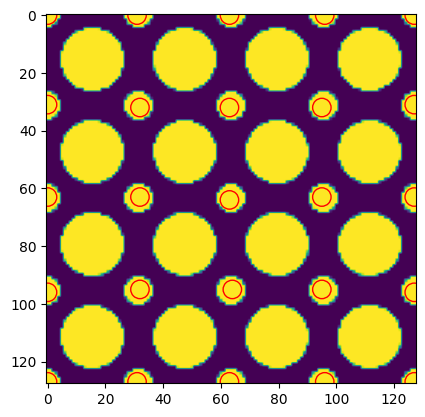

In [27]:
sigma_1 = 5.1
sigma_2 = 3
exp_maxima_small = find_maxima(DoG_small, k_xy=12)
visualize_maxima(image, exp_maxima_small, sigma_1, sigma_2/sigma_1, 'polka_small_exp.png')

By changing the increasing the window size, you can remove false maximas due to comparision with the true maxima (the small dots). In this case, I experiemented with trying to clear out the false positives from the small polka dots since the original output had a few lingering maxima indicators in the larger circles. By increasing the scale space, you also reduce the intensity of the image, which would also clear out the false maxima.

Cell Counting [10 pt] \
In computer vision, we often have to choose the correct set of parameters depending
on our problem space (or learn them; more on that later in the course). Your task here to to apply blob
detection to find the number of cells in 4 images of your choices from the images found in the /vgg cells
folder. Find a set of parameters for generating the scale space and finding the maxima that allows you to
accurately detect the cells in each of those images. Feel free to pre-process the images or the scale space
output to improve detection. Report the parameters used for the blob detection as well as the number of
detected cells for each of the images. Make sure to include the visualized blob detection for each of the
images in your report. Discuss your results as well as any additional steps you took to improve the cell
detection and counting.


Numbers of 002 Cells counted: 132


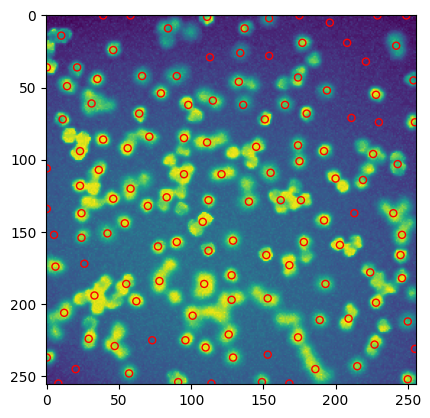

In [89]:
c = read_img("hw2_files\cells\\002cell.png")
s_output = scale_space(c, 3)
norm = cv2.normalize(s_output, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
maxima = find_maxima(norm, k_xy=10, k_s=3)
print(f"Numbers of 002 Cells counted: {len(maxima)}")
visualize_maxima(c, maxima, 3, 100, '002cell_scale_space_maxima.png')

Numbers of 007 Cells counted: 102


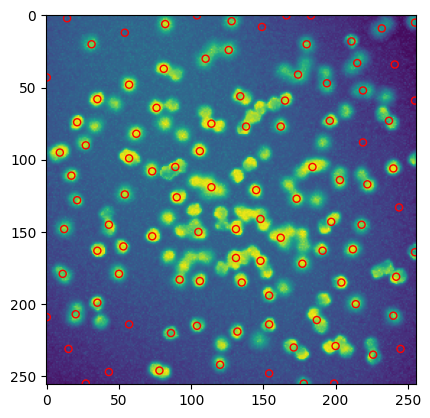

In [91]:
c = read_img("hw2_files\cells\\007cell.png")
s_output = scale_space(c, 3)
norm = cv2.normalize(s_output, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
maxima = find_maxima(norm, k_xy=12, k_s=3)
print(f"Numbers of 007 Cells counted: {len(maxima)}")
visualize_maxima(c, maxima, 3, 100, '007cell_scale_space_maxima.png')

Numbers of 012 Cells counted: 155


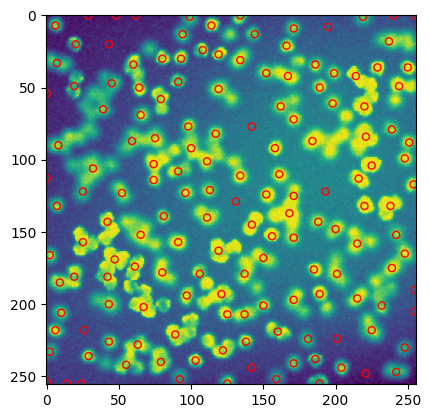

In [88]:
c = read_img("hw2_files\cells\\012cell.png")
s_output = scale_space(c, 3)
norm = cv2.normalize(s_output, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
maxima = find_maxima(norm, k_xy=8, k_s=3)
print(f"Numbers of 012 Cells counted: {len(maxima)}")
visualize_maxima(c, maxima, 3, 100, '012cell_scale_space_maxima.png')

Numbers of 024 Cells counted: 138


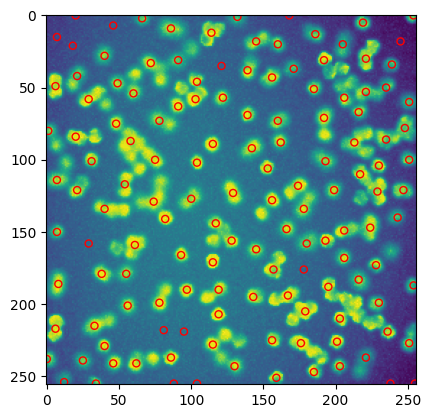

In [90]:
c = read_img("hw2_files\cells\\024cell.png")
s_output = scale_space(c, 3)
norm = cv2.normalize(s_output, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
maxima = find_maxima(norm, k_xy=9, k_s=3)
print(f"Numbers of 024 Cells counted: {len(maxima)}")
visualize_maxima(c, maxima, 3, 100, '024cell_scale_space_maxima.png')

The window size used to detected maxima for cell picture 2, 7, 12, 24 are 10, 12, 8, 9 respectively. The window size was determind based on how close the false positive blobs are to any local maxima. By increasing the window size, you can reduce the amount of false postives found in empty spaces. Conversly, by decreasing the window size, you can increase the number of true positives that were missed because they were close to another blob that had a higher maxima. All the variance, $\sigma$, were set to 3 since all the blobs were relatively the same size, picture to picture. Before processing the scale space, the picture would be normalized to reduce image differentials. 

All the pictures are missing some blobs in the detection. Due to how close they stack on top of each other, another cell with a higher maxima would be detected over it. There are also false positives in some empty spaces. this is do to the space having no neighbors that were actual cells to disregard them. If the window was increased to remove them, then you would run a risk of not being able to detect other cells with a lower local maxima.